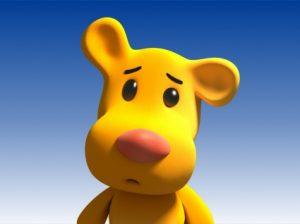

Blur image in software (naive)...
Done. Run time for naive implementation: 33.688719749450684 s.


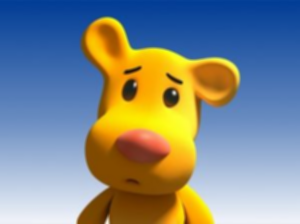

In [5]:
from PIL import Image as PIL_Image
import numpy as np
import time

# load and display the image
imgOrig = PIL_Image.open("image0.jpg")
imgWidth, imgHeight = imgOrig.size
display(imgOrig)
kernel_size = 3
offset = kernel_size // 2

# convert image to numpy array with dimensions imgHeight x imgWidth x 3
imgArr = np.asarray(imgOrig)
 

print('Blur image in software (naive)...')
start_time = time.time()
outputArr = np.full([imgHeight, imgWidth, 3], dtype=np.uint8, fill_value=0xff)

paddedArr = np.pad(imgArr, ((offset, offset), (offset, offset), (0, 0)), mode='edge') #pad with nearest neighbour

for y in range(imgHeight):
    for x in range(imgWidth):
        for c in range(3):  
            sum_val = 0
            for ky in range(-offset, offset + 1): # kernel iter
                for kx in range(-offset, offset + 1):
                    sum_val += paddedArr[y + ky + offset, x + kx + offset, c]
            outputArr[y, x, c] = sum_val / (kernel_size ** 2)  # Compute average
blurredImg = PIL_Image.fromarray(outputArr)
end_time = time.time()
execution_time = end_time - start_time

print(f'Done. Run time for naive implementation: {execution_time} s.')
display(blurredImg)



Done. Run time for naive implementation: 0.06342482566833496s.


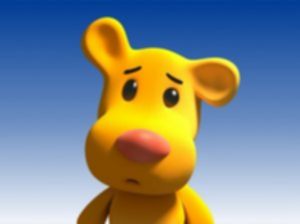

In [9]:
#now repeat with better scipy convolve
from scipy.ndimage import convolve


start_time = time.time()
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2) # define avg. kernel
outputArr = np.full([imgHeight, imgWidth, 3], dtype=np.uint8, fill_value=0xff)

for c in range(3):  # Iterate over RGB channels
    outputArr[:, :, c] = convolve(imgArr[:, :, c], kernel, mode='nearest')

blurredImg = PIL_Image.fromarray(outputArr)
end_time = time.time()
execution_time = end_time - start_time

print(f'Done. Run time for naive implementation: {execution_time}s.')
display(blurredImg)

